<a href="https://colab.research.google.com/github/aditya00kumar/data-science-with-python/blob/master/Perceptron_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

**Create dataset**

In [5]:
n_points = 500
centers = [[-0.5,0.5], [0.5,-0.5]]
X,y = datasets.make_blobs(n_samples=n_points, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.tensor(X)
y_data = torch.tensor(y.reshape(500,1))
print(y.shape)

(500,)


In [0]:
def plot_scatter():
  plt.scatter(X[y==0, 0], X[y==0,1])
  plt.scatter(X[y==1, 0], X[y==1,1])

**Plot scatter data**

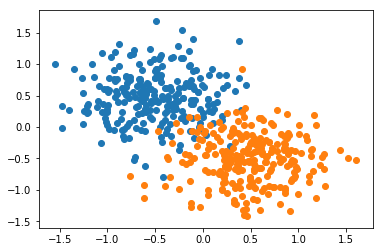

In [7]:
plot_scatter()

**Model**

In [0]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
      pred = torch.sigmoid(self.linear(x))
      return pred
    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

In [31]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [33]:
get_params()

(0.16220331192016602, -0.1682732105255127, 0.19390898942947388)

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0]) 
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  

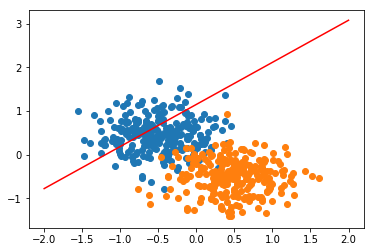

In [35]:
plot_scatter()
plot_fit('test')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [0]:
#model = model.double()

In [38]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data.float())
  loss = criterion(y_pred.float(), y_data.float())
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.6210837364196777
epoch: 1 loss: 0.6113148927688599
epoch: 2 loss: 0.6018539667129517
epoch: 3 loss: 0.5926896929740906
epoch: 4 loss: 0.5838112831115723
epoch: 5 loss: 0.5752094388008118
epoch: 6 loss: 0.566872775554657
epoch: 7 loss: 0.5587928295135498
epoch: 8 loss: 0.5509594082832336
epoch: 9 loss: 0.5433642864227295
epoch: 10 loss: 0.5359979271888733
epoch: 11 loss: 0.5288518667221069
epoch: 12 loss: 0.5219181180000305
epoch: 13 loss: 0.5151887536048889
epoch: 14 loss: 0.5086565017700195
epoch: 15 loss: 0.5023133754730225
epoch: 16 loss: 0.49615272879600525
epoch: 17 loss: 0.4901675879955292
epoch: 18 loss: 0.48435187339782715
epoch: 19 loss: 0.4786991775035858
epoch: 20 loss: 0.473203182220459
epoch: 21 loss: 0.46785876154899597
epoch: 22 loss: 0.46265971660614014
epoch: 23 loss: 0.45760101079940796
epoch: 24 loss: 0.45267757773399353
epoch: 25 loss: 0.4478846788406372
epoch: 26 loss: 0.44321733713150024
epoch: 27 loss: 0.4386713206768036
epoch: 28 loss: 0.4342427

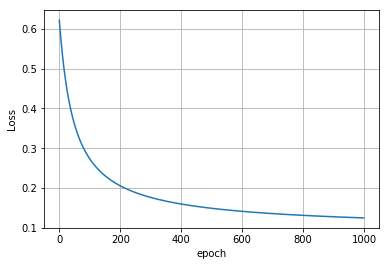

In [39]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

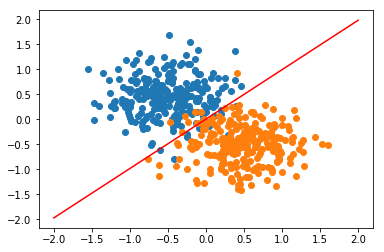

In [40]:
plot_scatter()
plot_fit("Trained Model")